# Podstawy Sztucznej Inteligencji 2020/2021


Prosze uzupelnic kod tam gdzie znajduje napis `YOUR CODE HERE` lub 'YOUR ANSWER HERE'.

Warto zresetowac 'kernel' i sprawdzic czy caly notatnik uruchamiany od poczatku nie daje bledow.

---

# k-means

In [1]:
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
import numpy as np

In [2]:
X, y = make_blobs(n_samples=150,
         n_features=2,
         centers=3,
         cluster_std=.5,
         shuffle=True,
         random_state=345)

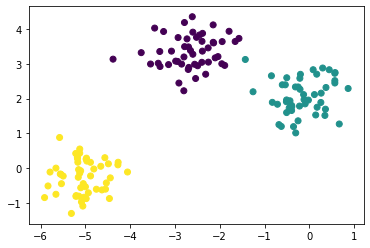

In [3]:
plt.scatter(X[:,0],X[:,1],c=y)

In [4]:
n_clusters = 3

Niech centra będą reprezentowane przez macierz $C$, gdzie pierwszy indeks numeruje centrum a drugi współrzędne. Wybierzmy jako centra kilka punktów z danych np.:

In [5]:
c = X[[1,2,3],:]


### Pogrupuj wg. centrów


Mając centra możemy przypisac każdy punkt ze zbioru danych do klasy o numerze  najbliższego mu centrum



In [6]:
km = []
for x_ in X:
    km.append(np.argmin([np.sum((x_ - c_)**2) for c_ in c]))
    
# km = 0
# for x_ in X:
#     km.append(np.argmin(np.sum((x_ - c)**2, axis=1)))

In [7]:
np.testing.assert_allclose(km[:17],[2, 0, 1, 2, 2, 2, 1, 2, 1, 2, 2, 1, 2, 2, 1, 2, 2])

Zobaczmy jaki otrzymalismy wynik:

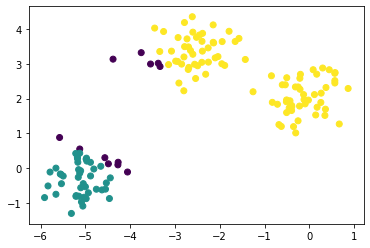

In [8]:
plt.scatter(X[:,0],X[:,1],c=km)

### Aktualiza centrów

Mając poklasyfikowane (wstępnie) dane można policzych ich centra po klasach 

In [9]:
km = np.array(km)

c = np.stack([np.mean(X[km==i], axis=0) for i in range(n_clusters)])

In [10]:
assert c.shape == (n_clusters, 2)
np.testing.assert_allclose(c,[[-4.22834853,  1.44810254],
       [-5.1174013 , -0.34387858],
       [-1.27885324,  2.68624462]], rtol=1e-3)

### Oblicz SSE 

Suma kwadratów odchyleń od średniej wewnątrz klastra:

$$
   SSE = \sum_c  \sigma^2_c
$$

 - $\sigma^2_c$ - wariancja  klastra $c$

 


In [11]:
var = [np.var(X[km==i]) for i in range(n_clusters)]

In [12]:
SSE = np.sum(var)
SSE

20.179479083179757

In [13]:
np.testing.assert_allclose(SSE, 20.1794,rtol=1e-3)

### Zaimplementuj algorytm k-means

Startując z począktowego przypisania średnich (centrów):

 1. Dla każdej klasy obliczamy średnią.
 2. Przypisujemy danym nowe klasy kierując się minimalną odległością od średniej
 3. Powtarzamy 1 i 2 aż podział nie będzie się zmieniał.
 
Algorytm można monitorować za pomocą wartości SSE.

**Note:** wystarczy kilka iteracji. 


In [20]:
c = X[[1,2,3],:]

#c = X[[1,2],:]
#n_clusters = c.shape[0]

for i in range(10):
    km = []
    for x_ in X:
        km.append(np.argmin([np.sum((x_ - c_)**2) for c_ in c]))
    
    km = np.array(km)

    c = np.stack([np.mean(X[km==i], axis=0) for i in range(n_clusters)])
    
    var = [np.var(X[km==i]) for i in range(n_clusters)]
    
    SSE = np.sum(var)
    
    print(SSE)

20.179479083179757
22.053691002983953
18.575450514419433
16.642698369278524
16.492575727998783
16.492575727998783
16.492575727998783
16.492575727998783
16.492575727998783
16.492575727998783


In [21]:
np.testing.assert_allclose(np.sort(np.bincount(km)), [49, 50, 51])

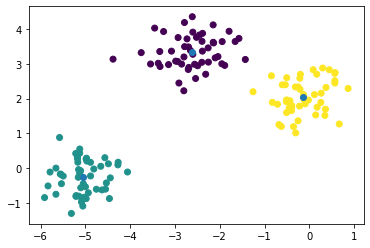

In [24]:
plt.scatter(X[:,0],X[:,1],c=km)
plt.scatter(c[:,0],c[:,1])

## implementacja w sklearn

In [17]:
from sklearn.cluster import KMeans
km = KMeans(n_clusters=3,
            init='random',
            n_init=10,
            max_iter=300,
            tol=1e-04,
            )
y_km = km.fit_predict(X)


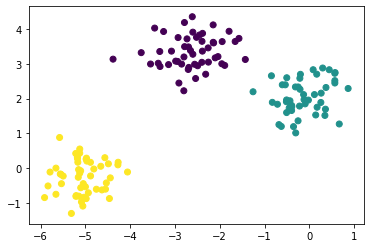

In [18]:
plt.scatter(X[:,0],X[:,1],c=y_km)

In [19]:
np.bincount(y_km)

array([51, 49, 50])